# Thera Bank Personal Loans Modelling Project

## Alfredo Coviello - Jul-10th-2020


### 1 - Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation

In [347]:
import numpy as np
import pandas as pd
import sklearn as sk
import scipy as stats
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [159]:
loan_data_original = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
loan_data_original.tail(100)
loan_data_original.head(100)
loan_data_original

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [160]:
loan_data_original.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [161]:
loan_data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# 2 - EDA: Study the data distribution in each attribute and target variable, share your findings

### Number of unique in each column?
### Number of people with zero mortgage?
### Number of people with zero credit card spending per month?
### Value counts of all categorical columns.
### Univariate and Bivariate
### Get data model ready

In [197]:
print("IsNull:\n%s\n" % loan_data_original.isnull().count())
print("IsNa:\n%s\n"% loan_data_original.isna().count())
for c in loan_data_original.columns:
    counts = loan_data_original[c].value_counts(normalize=True)
    print(f"{c} unique values count: { counts.count()}. Unique values:\n{counts}\n")
    

IsNull:
ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

IsNa:
ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

ID unique values count: 5000. Unique values:
2047    0.0002
2608    0.0002
4647    0.0002
2600    0.0002
553     0.0002
         ...  
3263    0.0002
1218    0.0002
3267    0.0002
1222    0.0002
2049   

In [230]:
loan_data_original.Income.value_counts(normalize=True).sort_index() # Ok, no 0 values

8      0.0046
9      0.0052
10     0.0046
11     0.0054
12     0.0060
        ...  
203    0.0004
204    0.0006
205    0.0004
218    0.0002
224    0.0002
Name: Income, Length: 162, dtype: float64

In [228]:
loan_data_original.CCAvg.value_counts(normalize=True).sort_index()

0.0     0.0212
0.1     0.0366
0.2     0.0408
0.3     0.0482
0.4     0.0358
         ...  
8.8     0.0018
8.9     0.0002
9.0     0.0004
9.3     0.0002
10.0    0.0006
Name: CCAvg, Length: 108, dtype: float64

In [165]:
# Experience has negative numbers, make them 0's
# Zip code: 1 has 4 digits, rest has 5 - OK, it's a categorical value
# Categorical variables: Zip Code, Personal Loan, Securities Account, CD Account, Online, CreditCard
# ID not needed

# Review all negative Experience records:
loan_data_original[ loan_data_original["Experience"] < 0 ] # 52 records
loan_data_original[ loan_data_original["Experience"] < 0 ].Age.mean() # 24.5
# In a real world scenario, I would investigate why this value is negative as it does not make any sense.
# But without this knowledge, I will assume their experience is 0 years, which might be 
# a plausible explanation given age mean for these is 24.5

24.51923076923077

In [269]:
# Set negative Experience values to 0
loan_data = loan_data_original.copy(deep=True)
loan_data.loc[loan_data["Experience"] < 0, "Experience"] = 0

# Drop ID
loan_data.drop("ID", axis=1, inplace=True)
loan_data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
# TODO's: use sklearn.impute SimleImputer for the negative values?

In [761]:
# Make these Categorical variables: Zip Code, Personal Loan, Securities Account, CD Account, Online, CreditCard, Education

loan_data["ZIP Code"] = loan_data["ZIP Code"].astype("category")
loan_data["Personal Loan"] = loan_data["Personal Loan"].astype("category")
loan_data["Securities Account"] = loan_data["Securities Account"].astype("category")
loan_data["CD Account"] = loan_data["CD Account"].astype("category")
loan_data["Online"] = loan_data["Online"].astype("category")
loan_data["CreditCard"] = loan_data["CreditCard"].astype("category")
loan_data["Education"] = loan_data["Education"].astype("category")

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIP Code            5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal Loan       5000 non-null   category
 9   Securities Account  5000 non-null   category
 10  CD Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 297.8 KB


In [762]:
loan_data.isnull().values.any() # double confirmation, no null values

False

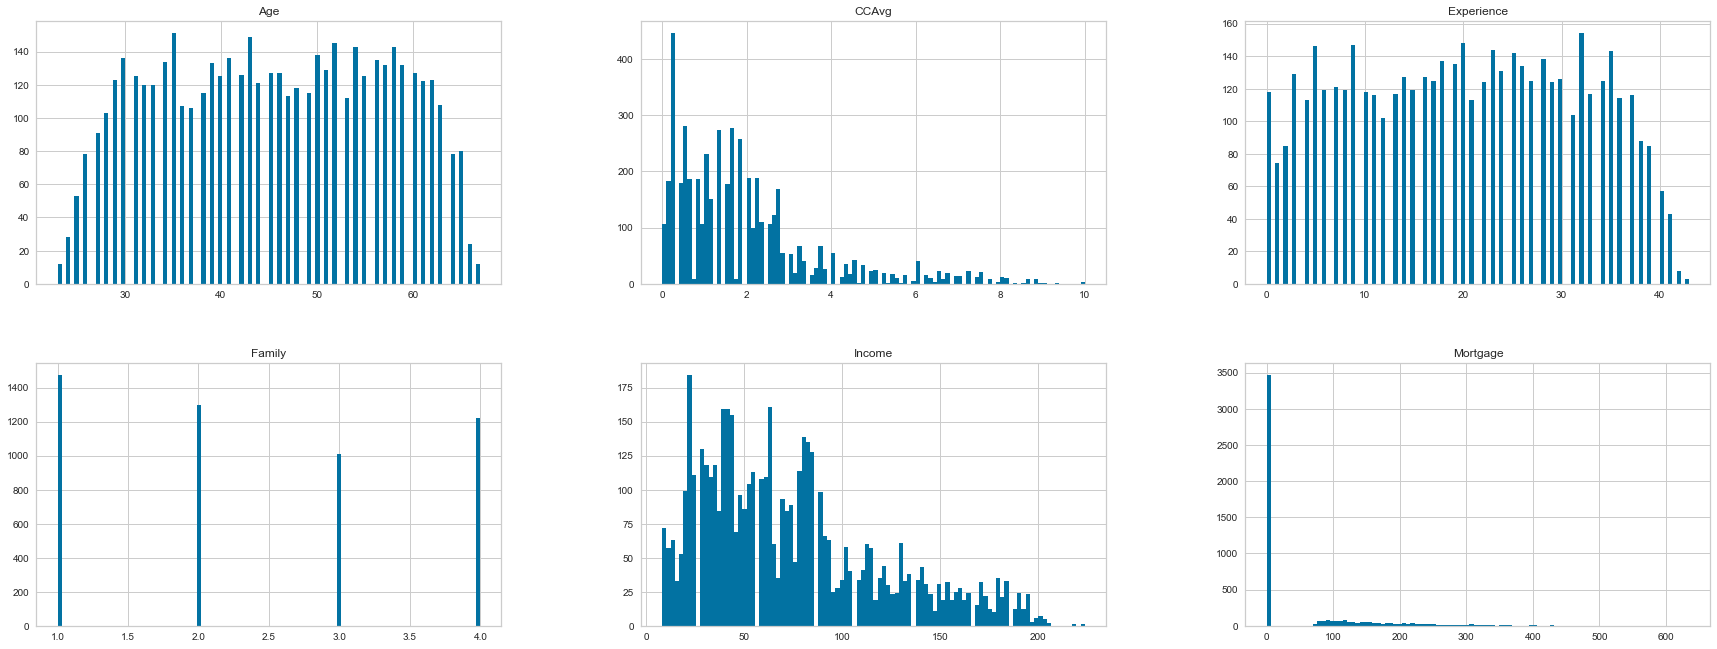

In [763]:
cols = loan_data.columns.difference(("Personal Loan",))
loan_data[cols].hist(stacked=False, bins=100, figsize=(30,30), layout=(5,3) );

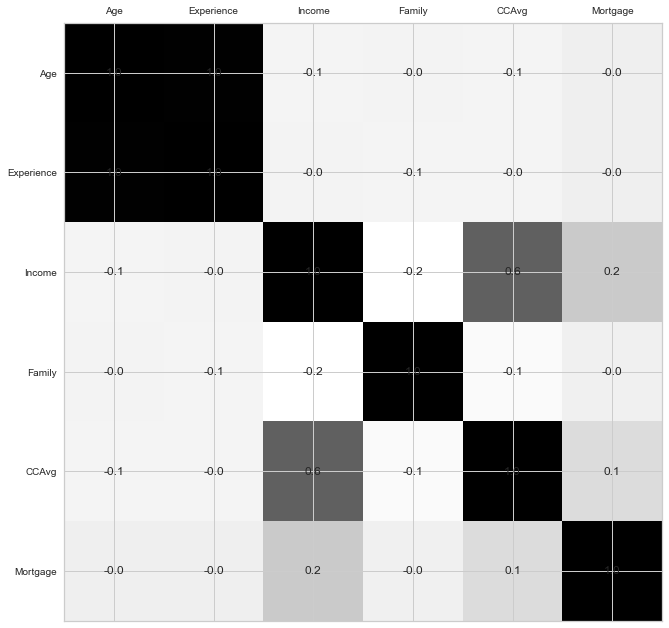

In [765]:
def plot_corr(df, size=11):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

plot_corr(loan_data)

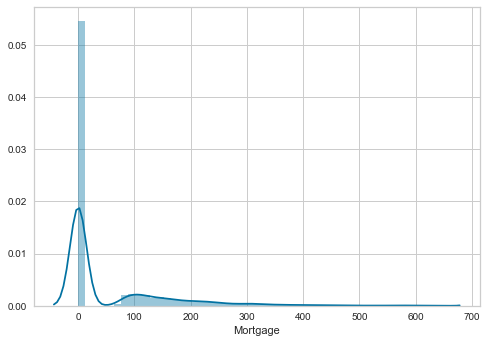

In [731]:
#sns.boxplot(loan_data.Mortgage);
sns.distplot(loan_data.Mortgage, kde=True);

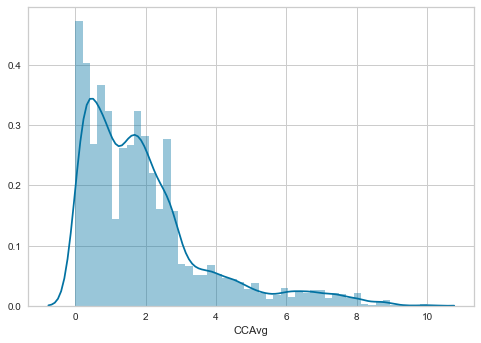

In [732]:
#sns.boxplot(loan_data.CCAvg);
sns.distplot(loan_data.CCAvg);

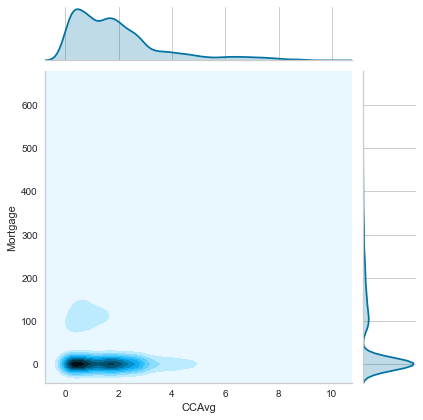

In [734]:
sns.jointplot(loan_data.CCAvg,loan_data.Mortgage, kind="kde" );  #kind="resid"

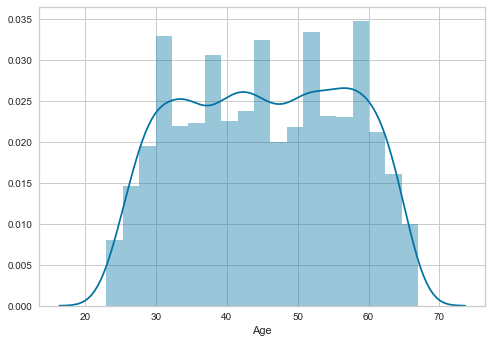

In [735]:
#sns.countplot(data=loan_data, x="Age");
sns.distplot(loan_data.Age);

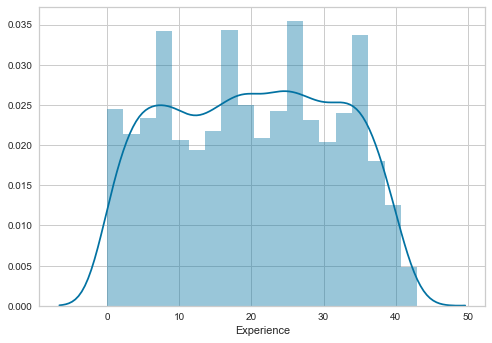

In [736]:
#sns.countplot(data=loan_data, x="Experience")
sns.distplot(loan_data.Experience);

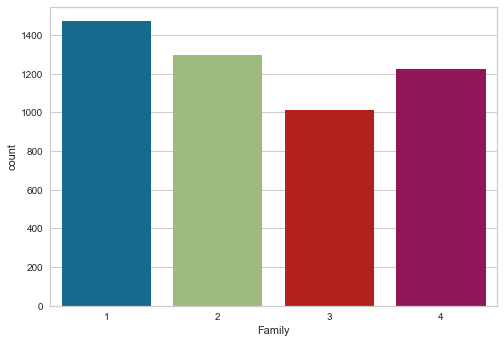

In [737]:
sns.countplot(data=loan_data, x="Family");

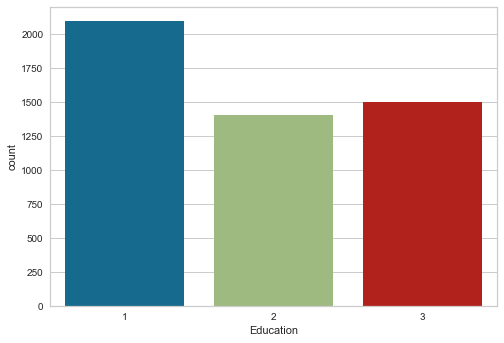

In [766]:
sns.countplot(data=loan_data, x="Education");

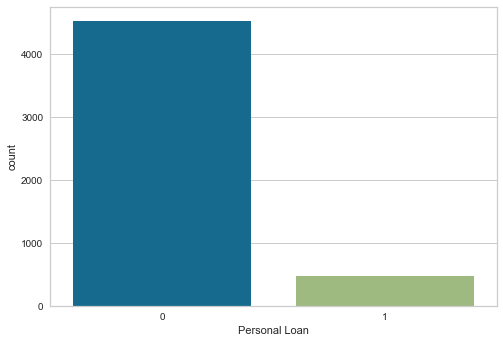

In [739]:
sns.countplot(data=loan_data, x="Personal Loan");

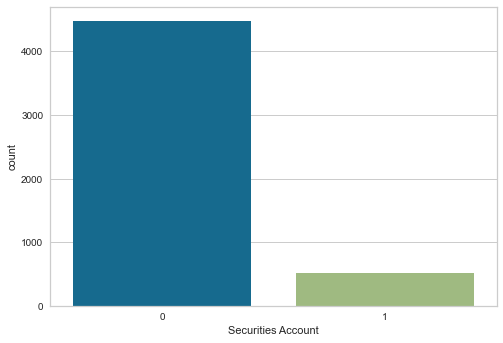

In [740]:
sns.countplot(data=loan_data, x="Securities Account");

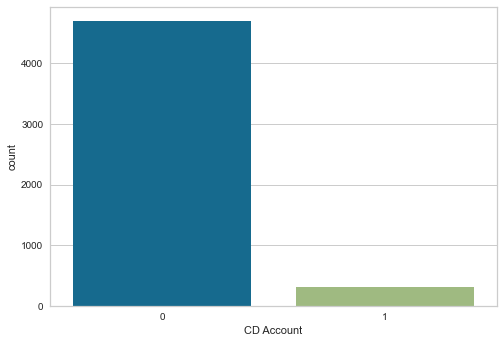

In [741]:
sns.countplot(data=loan_data, x="CD Account");

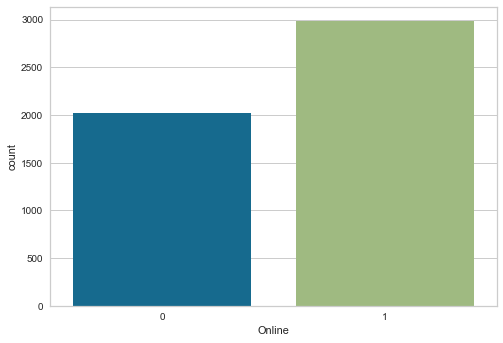

In [742]:
sns.countplot(data=loan_data, x="Online");

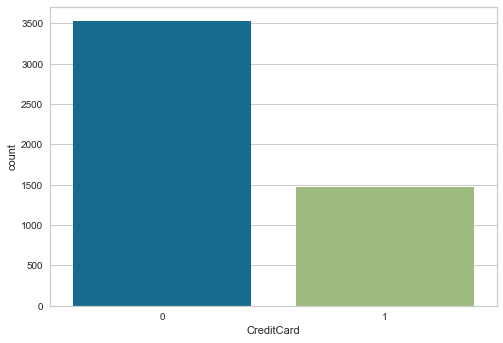

In [743]:
sns.countplot(data=loan_data, x="CreditCard");

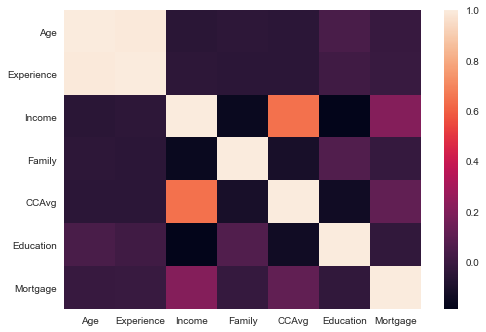

In [744]:
sns.heatmap( loan_data.corr() );

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


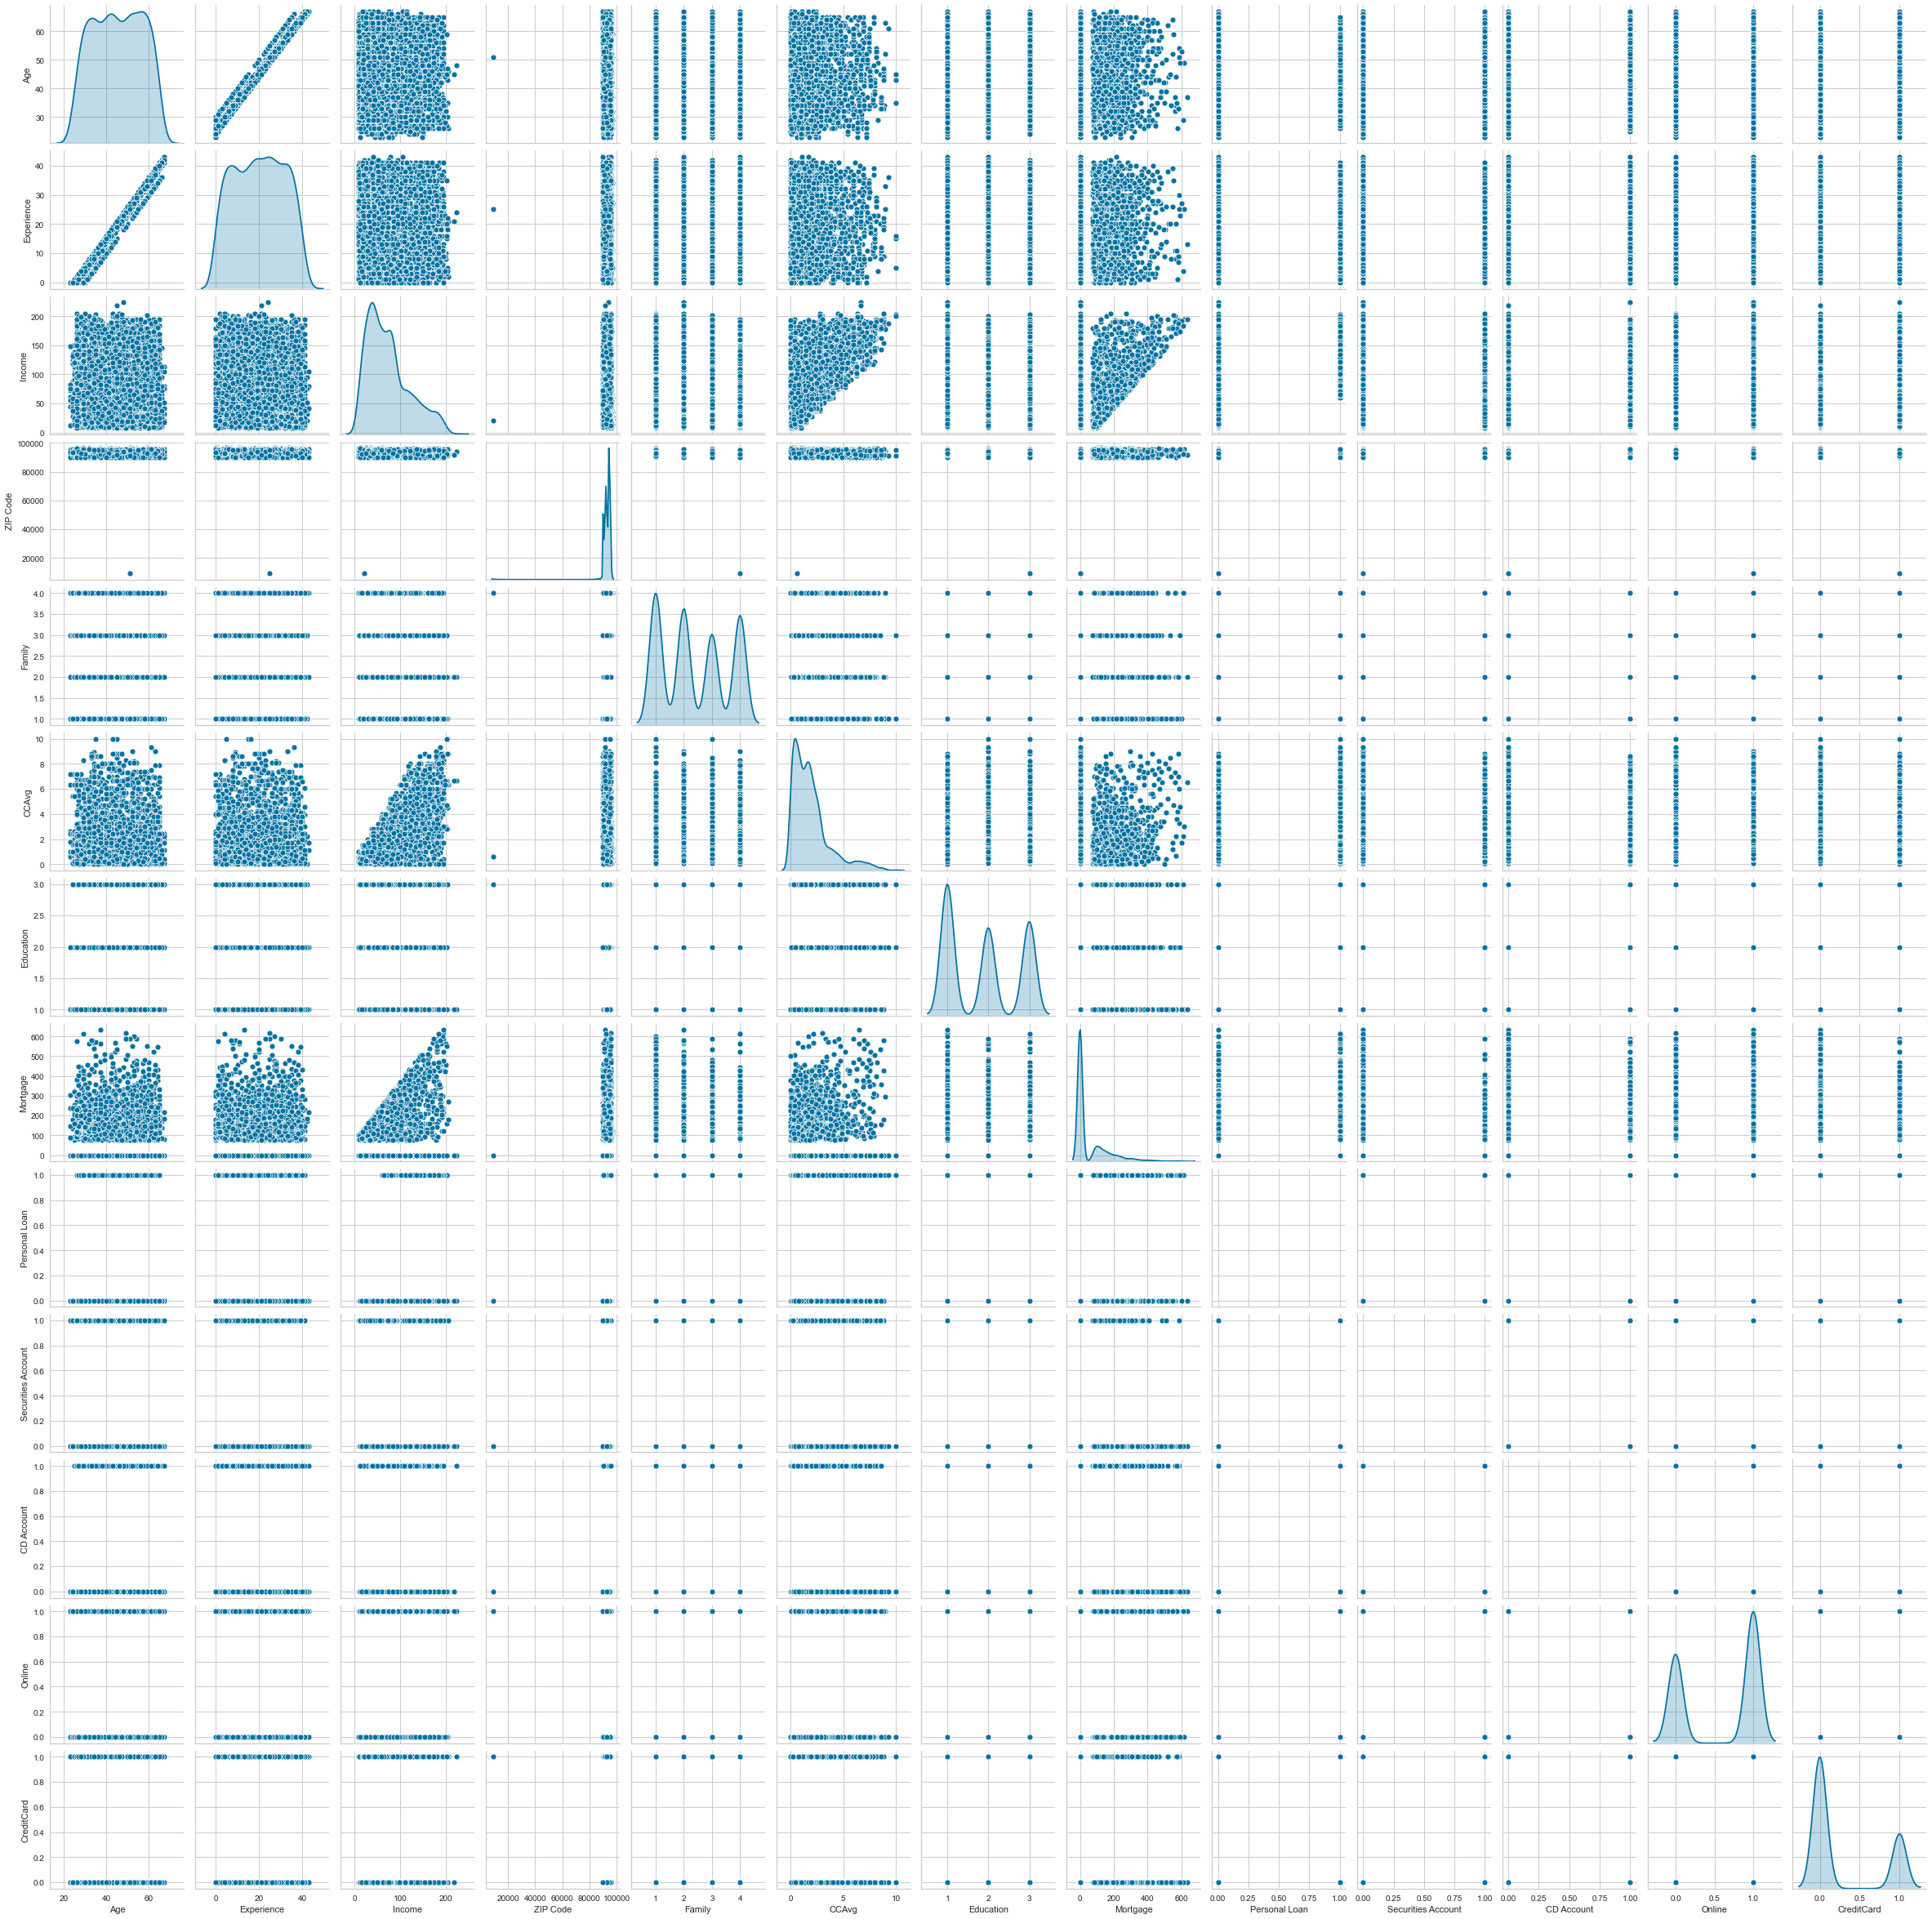

In [767]:
sns.pairplot(loan_data, diag_kind="kde");

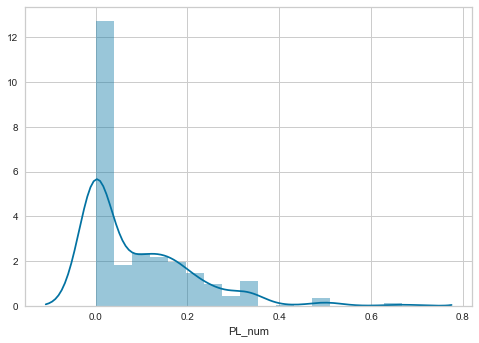

In [758]:
loan_data["PL_num"] = loan_data["Personal Loan"].astype("int32" )
#print(f'Count of ZIP codes with NO Personal loans: {loan_data.groupby("ZIP Code")["PL_num"].mean() [ loan_data.groupby("ZIP Code")["PL_num"].mean() ==0 ].count()}')
#print(f'Count of ZIP codes with Personal loans: {loan_data.groupby("ZIP Code")["PL_num"].mean() [ loan_data.groupby("ZIP Code")["PL_num"].mean() >0 ].count()}')

# Checking out ZIP Code data - 500 different codes for 5000 records. About 40% (2000) records are concentrated in 10% (50) codes, very skewed
sns.distplot(loan_data.groupby("ZIP Code")["PL_num"].mean())

zip_codes = loan_data.groupby("ZIP Code").count().sort_values("PL_num", ascending=False).head(50)["PL_num"]
loan_data.merge(zip_codes, left_on="ZIP Code", right_on="ZIP Code") #.groupby("ZIP Code")["Education"].count()

loan_data.drop("PL_num", inplace=True, axis=1)



In [757]:
# Observations:

# Y/dependent variable Personal Loan:
#    90% with NO Personal Loan
#    10% with Personal Loan
# highly unbalanced

# There are 3462 or 69.3% of people with no mortgage (0 Mortgage)
# There are 106 or 2.1% of people with 0 Credit card spending
# There are 90% of people wth NO Security Account
# There are 93% of people with NO CD  Account
# There are 60% of people with Online account
# There are 70% of people with NO Credit Card

#loan_data[ loan_data["Personal Loan"] == 1 ]
#loan_data.groupby("Personal Loan")["Mortgage"].mean()
#loan_data.groupby("Mortgage")["PL_num"].mean()

# 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [768]:
X = loan_data.drop(["Personal Loan", "ZIP Code"] , axis=1) # Dropping ZIP Code, otherwise there's no convergence in models! It does not carry much information.
Y = loan_data["Personal Loan"]

X = pd.get_dummies(X, drop_first=True)

In [770]:
print(f"X.shape:{X.shape}\nY.shape:{Y.shape}\nY.value_counts:\n{Y.value_counts(normalize=True)}")

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.3, random_state=2)

print(f"x_train.shape:{x_train.shape}\nx_test.shape:{x_test.shape}\ny_train.shape:{y_train.shape}\ny_test.shape:{y_test.shape}")
print(f"Split ratio: { format(x_train.shape[0] / loan_data.shape[0], '0.02f') }")

print(f"y_train.value_counts:\n{y_train.value_counts(normalize=True)}")
print(f"y_test.value_counts:\n{y_test.value_counts(normalize=True)}")

X.shape:(5000, 12)
Y.shape:(5000,)
Y.value_counts:
0   0.90
1   0.10
Name: Personal Loan, dtype: float64
x_train.shape:(3500, 12)
x_test.shape:(1500, 12)
y_train.shape:(3500,)
y_test.shape:(1500,)
Split ratio: 0.70
y_train.value_counts:
0   0.90
1   0.10
Name: Personal Loan, dtype: float64
y_test.value_counts:
0   0.91
1   0.09
Name: Personal Loan, dtype: float64


In [771]:
x_train

,Age,Experience,Income,Family,CCAvg,Mortgage,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
2416,60,35,32,1,0.30,80,0,1,0,0,1,0
2417,25,0,53,2,1.60,0,0,1,0,0,1,1
2513,52,26,71,1,1.40,0,0,1,0,0,0,0
1698,44,20,149,1,1.70,0,0,0,0,0,1,0
3322,41,16,104,1,4.00,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3335,35,10,118,2,7.80,358,0,0,0,0,0,0
1099,30,6,52,3,0.70,0,1,0,0,0,1,0
2514,41,16,25,2,0.10,91,1,0,1,0,0,0
3606,43,18,9,2,0.00,96,0,1,0,0,1,1


# 4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance

## Todo's: check different approaches:

### statsmodel api
### sklearn: different solvers



In [772]:
# Using statsmodel api, try out the different solves and check the model performance and see parameters that seem significant
import statsmodels.api as sm
from scipy import stats

#y_train.value_counts()
print(x_train.columns)
# 'newton’, ‘nm’, ‘bfgs’, ‘lbfgs’, ‘powell’, ‘cg’, ‘ncg’, ‘basinhopping’ ‘minimize’ for generic wrapper of scipy minimize

for method in [ 'newton', 'nm', 'bfgs', 'lbfgs', 'powell', 'cg', 'ncg', 'basinhopping']:
    print(f"\n***********\n Method: {method}\n***********\n")
    logit = sm.Logit(y_train, sm.add_constant(x_train))
    lg = logit.fit(method=method, maxiter=100)
    stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
    print(lg.summary())
    lgcoef = pd.DataFrame(lg.params, columns=['coef'])
    lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
    lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
    lgcoef['pval']=lg.pvalues
    pd.options.display.float_format = '{:.2f}'.format
    lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
    pval_filter = lgcoef['pval']<=0.1
    print(lgcoef[pval_filter])



Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage',
       'Education_2', 'Education_3', 'Securities Account_1', 'CD Account_1',
       'Online_1', 'CreditCard_1'],
      dtype='object')

***********
 Method: newton
***********

Optimization terminated successfully.
         Current function value: 0.106979
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.6657
Time:                        18:10:12   Log-Likelihood:                -374.43
converged:                       True   LL-Null:                       -1120.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3487
Method:                           MLE   Df Model:                           12
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.6427
Time:                        18:10:12   Log-Likelihood:                -400.18
converged:                      False   LL-Null:                       -1120.1
Covariance Type:            nonrobust   LLR p-value:                3.533e-301
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.4911      2.409     -0.204      0.838      -5.213       4.231
Age                     -0.4740      0.098     -4.851      0.000      -0.666      -0.282
Experience  

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide

basinhopping step 2: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 3: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 4: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 5: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 6: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 7: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 8: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 9: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 10: f 0.10698 trial_f 0.10698 accepted 1  lowest_f 0.106979
basinhopping step 11: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 12: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 13: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 14: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 15: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 16: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


basinhopping step 17: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 18: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 19: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 20: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 21: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 22: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 23: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 24: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 25: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 26: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 27: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 28: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 29: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 30: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 31: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 32: f 0.10698 trial_f 0.10698 accepted 1  lowest_f 0.106979


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 33: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 34: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 35: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 36: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 37: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 38: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 39: f 0.10698 trial_f 0.10698 accepted 1  lowest_f 0.106979
basinhopping step 40: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 41: f 0.10698 trial_f 0.10698 accepted 1  lowest_f 0.106979
basinhopping step 42: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 43: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 44: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 45: f 0.106979 trial_f 0.1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 48: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 49: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
adaptive stepsize: acceptance rate 0.980000 target 0.500000 new stepsize 0.555556 old stepsize 0.5
basinhopping step 50: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 51: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 52: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 53: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 54: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 55: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 56: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 57: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 58: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 59: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 60: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 61: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 62: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 63: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 64: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 65: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 66: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 67: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 68: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 69: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 70: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 71: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 72: f 0.10698 trial_f 0.10698 accepted 1  lowest_f 0.106979
basinhopping step 73: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 74: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 75: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 76: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 77: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 78: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 79: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 80: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 81: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 82: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 83: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 84: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 85: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 86: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 87: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered 

basinhopping step 88: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 89: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 90: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 91: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 92: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 93: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 94: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 95: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 96: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 97: f 0.10698 trial_f 0.10698 accepted 1  lowest_f 0.106979
basinhopping step 98: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
basinhopping step 99: f 0.106979 trial_f 0.106979 accepted 1  lowest_f 0.106979
adaptive stepsize: acceptance rate 0.99000

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


In [618]:
# Converging methods: newton, bfgs, powell, ncg, basinhopping

# Customers with a Education 3 (Advanced/Professional) have a 99% probability of getting a Personal Loan
# Customers with a CD Account have a 98% probability of getting a Personal Loan
# Customers with a Education 2 (Graduate) have a 98% probability of getting a Personal Loan


                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3488
Method:                           MLE   Df Model:                           11
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.6351
Time:                        13:20:21   Log-Likelihood:                -408.70
converged:                       True   LL-Null:                       -1120.1
Covariance Type:            nonrobust   LLR p-value:                1.428e-298
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -14.8102      2.071     -7.153      0.000     -18.868     -10.752
Age                     -0.0022      0.075     -0.029      0.977      -0.150       0.145
Experience  

******************
Solver: liblinear
******************
[LibLinear]Training accuracy: 0.9608571428571429
Testing accuracy: 0.9486666666666667
Accuracy sklearn: 0.9486666666666667
Precision sklearn: 0.8351648351648352
Recall sklearn: 0.5507246376811594
F1 sklearn: 0.663755458515284
Roc Auc Score sklearn: 0.7698557109110643 


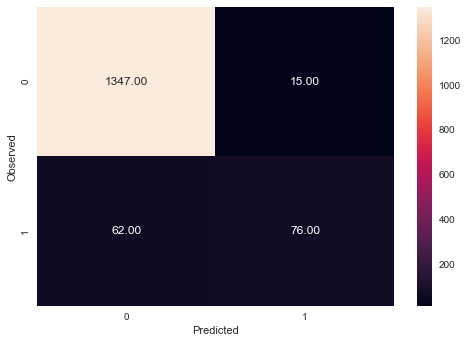

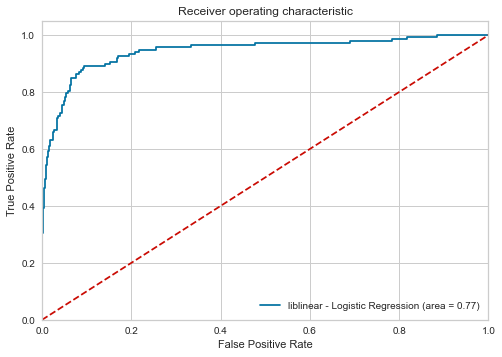

******************
Solver: newton-cg
******************
Training accuracy: 0.9602857142857143
Testing accuracy: 0.952
Accuracy sklearn: 0.952
Precision sklearn: 0.851063829787234
Recall sklearn: 0.5797101449275363
F1 sklearn: 0.689655172413793
Roc Auc Score sklearn: 0.7847155717295538 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


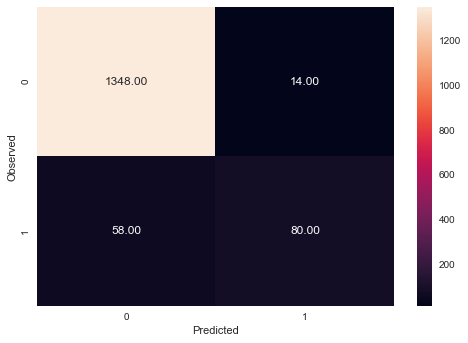

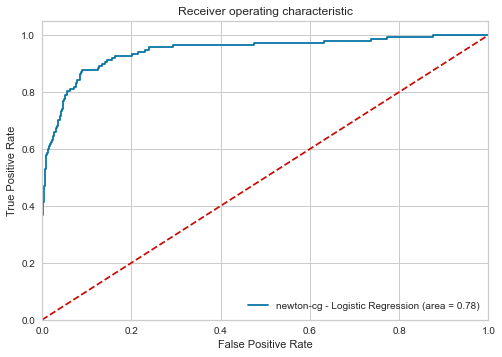

******************
Solver: lbfgs
******************
Training accuracy: 0.9605714285714285
Testing accuracy: 0.9486666666666667
Accuracy sklearn: 0.9486666666666667
Precision sklearn: 0.8351648351648352
Recall sklearn: 0.5507246376811594
F1 sklearn: 0.663755458515284
Roc Auc Score sklearn: 0.7698557109110643 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


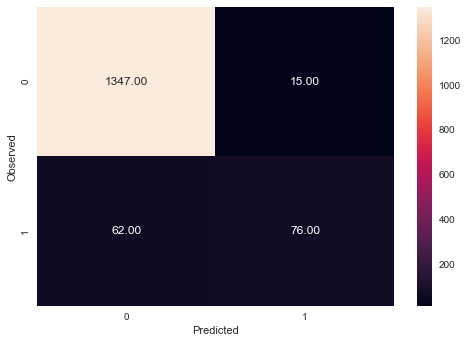

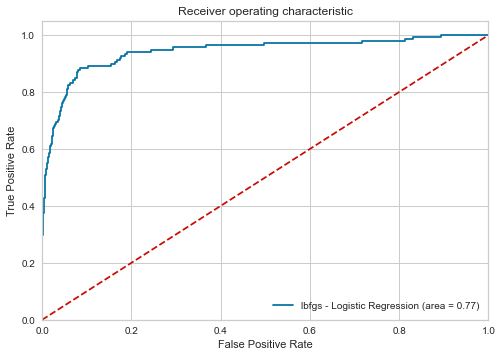

******************
Solver: sag
******************
max_iter reached after 0 seconds
Training accuracy: 0.9105714285714286
Testing accuracy: 0.9013333333333333
Accuracy sklearn: 0.9013333333333333
Precision sklearn: 0.4358974358974359
Recall sklearn: 0.2463768115942029
F1 sklearn: 0.3148148148148148
Roc Auc Score sklearn: 0.6070356892038562 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


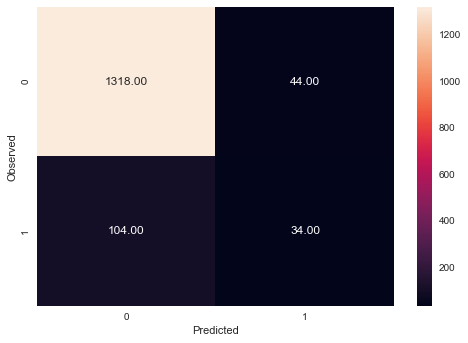

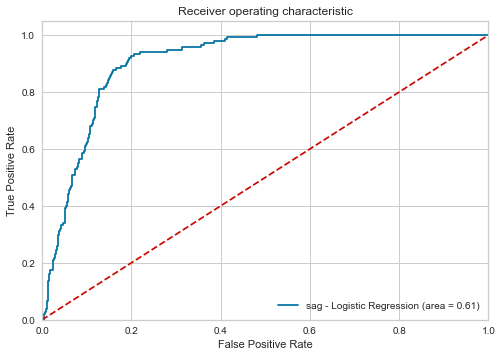

******************
Solver: saga
******************
max_iter reached after 0 seconds
Training accuracy: 0.9097142857142857
Testing accuracy: 0.9006666666666666
Accuracy sklearn: 0.9006666666666666
Precision sklearn: 0.42857142857142855
Recall sklearn: 0.2391304347826087
F1 sklearn: 0.30697674418604654
Roc Auc Score sklearn: 0.6034125007980591 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


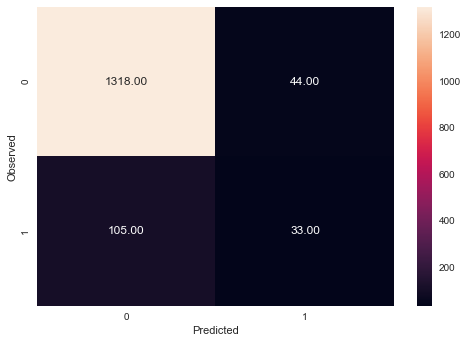

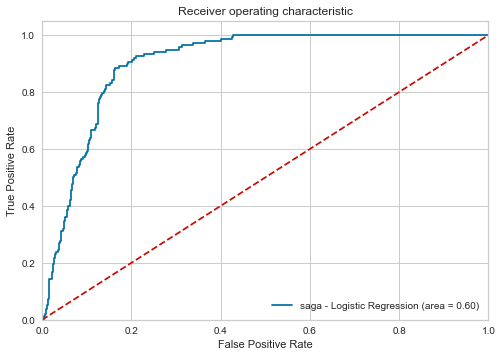

In [773]:
# Use different solvers and plot their CM and ROC AUC

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

for solver in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']:# ['liblinear', 'library', 'newton-cg', 'sag', 'saga', 'lbfgs']:
    print(f"******************\nSolver: {solver}\n******************")

    model = LogisticRegression(solver=solver, verbose=True, max_iter=100) # class_weight=class_weight) #, l1_ratio=0.5) # class_weight=class_weight ) # 'liblinear' 'library, 'newton-cg', 'sag', 'saga' and 'lbfgs'
    model.fit(x_train, y_train, )
    y_predict = model.predict(x_test)

    coef_df = pd.DataFrame(model.coef_)
    coef_df["intercept"] = model.intercept_
#    print(f"Coefs:\n {coef_df}")

    model_score_train = model.score(x_train, y_train)
    print("Training accuracy:", model_score_train)

    model_score_test = model.score(x_test, y_test)
    print("Testing accuracy:", model_score_test)

    cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    '''
    print(f"Accuracy: {(TP+TN)/(TP+TN+FP+FN)}")
    print(f"Precision: {(TP)/(TP+FP)}")
    print(f"Recall: {(TP)/(TP+FN)}")
    '''
#    print(f"TP: {TP} TN: {TN} FP: {FP} FN: {FN}")
    print(f"Accuracy sklearn: {accuracy_score(y_test, y_predict)}" )
    print(f"Precision sklearn: {precision_score(y_test, y_predict)}" )
    print(f"Recall sklearn: {recall_score(y_test, y_predict)}" )
    print(f"F1 sklearn: {f1_score(y_test, y_predict)}")
    print(f"Roc Auc Score sklearn: {roc_auc_score(y_test, y_predict)} " )

    draw_cm(y_test, y_predict)
    
    logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
    fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='%s - Logistic Regression (area = %0.2f)' % (solver,logit_roc_auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()


# 5. Give your reasoning on how can the model perform better? 

In [774]:
# I will check the params of the model, try different solvers and parameters until I find the best performance for train and test sets

model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.0001,
 'verbose': True,
 'warm_start': False}

In [775]:
# Iterate over solvers that use l2 penalty

train_score=[]
test_score=[]
max_train = 0
max_test = 0
solvers =  ['newton-cg','lbfgs','liblinear','sag','saga'] # testing with solvers for l2 penalty
for solver in solvers:
#    print(f"******************\nSolver: {solver}\n******************")

    model = LogisticRegression(random_state=2,solver=solver, verbose=True, max_iter=200, penalty='l2', C=0.75 ) # class_weight=class_weight) #, l1_ratio=0.5) # class_weight=class_weight ) # 'liblinear' 'library, 'newton-cg', 'sag', 'saga' and 'lbfgs'
    model.fit(x_train, y_train )
    y_predict = model.predict(x_test)

    trains = round(model.score(x_train, y_train),3)
    train_score.append(trains)
    tests = round(model.score(x_test, y_test),3)
    test_score.append(tests)

    max_train = max(max_train, trains)
    max_test = max(max_test, tests)

print(solvers)
print()
print(train_score)
print()
print(test_score)
print(max_train, max_test)

# (0.961 + 0.949) for liblinear and (0.959 + 0.951) for newton-cg


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


[LibLinear]max_iter reached after 0 seconds


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 1 seconds
['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.959, 0.96, 0.961, 0.916, 0.911]

[0.951, 0.948, 0.949, 0.907, 0.901]
0.961 0.951


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [778]:
# Iterate through solvers with l1 penalty
train_score=[]
test_score=[]
max_train = 0
max_test = 0
solvers =  ['liblinear','saga'] # test solvers for l1 penaly
for solver in solvers:
#    print(f"******************\nSolver: {solver}\n******************")

    model = LogisticRegression(random_state=2,solver=solver, verbose=True, max_iter=200, penalty='l1', C=0.75 ) # class_weight=class_weight) #, l1_ratio=0.5) # class_weight=class_weight ) # 'liblinear' 'library, 'newton-cg', 'sag', 'saga' and 'lbfgs'
    model.fit(x_train, y_train )
    y_predict = model.predict(x_test)

    trains = round(model.score(x_train, y_train),3)
    train_score.append(trains)

    tests = round(model.score(x_test, y_test),3)
    test_score.append(tests)

    max_train = max(max_train, trains)
    max_test = max(max_test, tests)

print(solvers)
print()
print(train_score)
print()
print(test_score)
print(max_train, max_test)

# (0.96 + 0.952) for liblinear


[LibLinear]max_iter reached after 0 seconds
['liblinear', 'saga']

[0.96, 0.911]

[0.952, 0.901]
0.96 0.952


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


In [690]:
# Between the 3 best performances:
# l2 (0.961 + 0.949) for liblinear and (0.959 + 0.951) for newton-cg
# l1 (0.96 + 0.952) for liblinear

# Very similar performances.

In [788]:
# Let's check performance for "balanced"
print("liblinear l2")
model = LogisticRegression(random_state=2,penalty='l2',solver='liblinear', C=0.75, class_weight='balanced', max_iter=200) # changing class weight to balanced
model.fit(x_train, y_train) 
y_predict = model.predict(x_test)     
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print("Total accuracy:", model.score(x_train,y_train) + model.score(x_test, y_test))

print("\nnewton-cg l2")
model = LogisticRegression(random_state=2,penalty='l2',solver='newton-cg', C=0.75, class_weight='balanced', max_iter=200) # changing class weight to balanced
model.fit(x_train, y_train) 
y_predict = model.predict(x_test)     
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print("Total accuracy:", model.score(x_train,y_train) + model.score(x_test, y_test))

print("\nliblinear l1")
model = LogisticRegression(random_state=2,penalty='l1',solver='liblinear', C=0.75, class_weight='balanced', max_iter=200) # changing class weight to balanced
model.fit(x_train, y_train) 
y_predict = model.predict(x_test)     
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print("Sum of accuracies:", model.score(x_train,y_train) + model.score(x_test, y_test))


liblinear l2
Trainig accuracy 0.9071428571428571

Testing accuracy 0.9153333333333333
Total accuracy: 1.8224761904761904

newton-cg l2
Trainig accuracy 0.9105714285714286

Testing accuracy 0.9126666666666666
Total accuracy: 1.823238095238095

liblinear l1
Trainig accuracy 0.9097142857142857

Testing accuracy 0.9146666666666666
Sum of accuracies: 1.8243809523809524


In [700]:
# Train and Testing set performances identical now with class weight balanced.
# Will choose liblinear l1 as FINAL

In [789]:
# Now try different values for c to find the best performance

train_score=[]
test_score=[]
max_train = 0
max_test = 0
cvalues = [0.01,0.1,0.25,0.5, 0.70, 0.75, 0.8, 1]
for c in cvalues:
#    print(f"******************\nSolver: {solver}\n******************")

    model = LogisticRegression(random_state=2,solver='liblinear', verbose=True, max_iter=200, penalty='l1', C=c )
    model.fit(x_train, y_train )
    y_predict = model.predict(x_test)

    trains = round(model.score(x_train, y_train),3)
    train_score.append(trains)

    tests = round(model.score(x_test, y_test),3)
    test_score.append(tests)

    max_train = max(max_train, trains)
    max_test = max(max_test, tests)
print("\n")
print(cvalues)
print()
print(train_score)
print()
print(test_score)
print(max_train, max_test)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[0.01, 0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 1]

[0.914, 0.955, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96]

[0.907, 0.941, 0.948, 0.951, 0.952, 0.952, 0.952, 0.952]
0.96 0.952


Trainig accuracy 0.9097142857142857

Testing accuracy 0.9146666666666666

Confusion Matrix


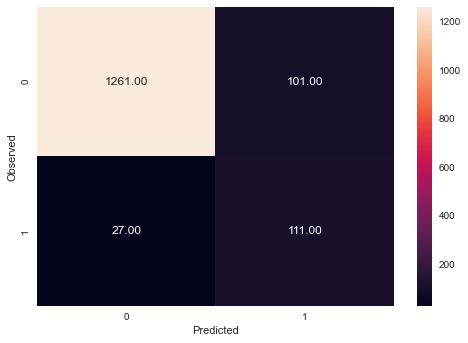

None

Recall: 0.8043478260869565

Precision: 0.5235849056603774

F1 Score: 0.6342857142857143

Roc Auc Score: 0.8650960863180744


In [790]:
# Best performance (0.955 + 0.943) @ c = 0.5 (default)

# Final model is liblinear, l1, 0.75

model = LogisticRegression(random_state=2,penalty='l1', solver='liblinear', class_weight='balanced',C=0.75, max_iter=200) 
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Trainig accuracy",model.score(x_train,y_train))  
print()
print("Testing accuracy",model.score(x_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


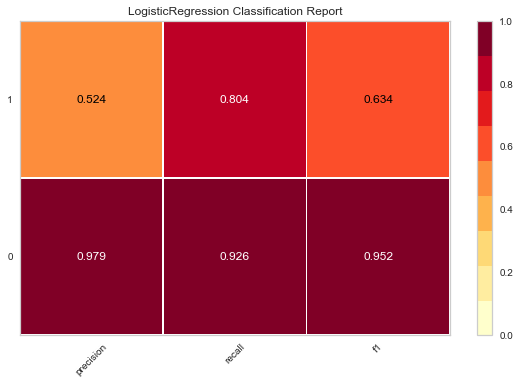

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


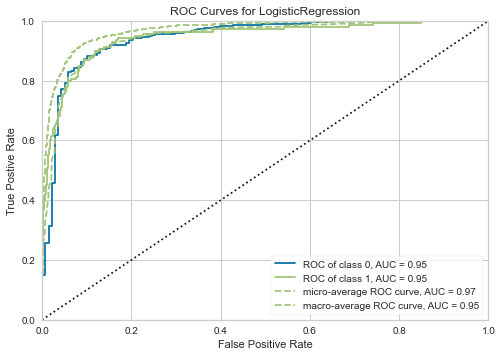

In [791]:
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(x_train, y_train)
viz.score(x_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(x_train, y_train)
roc.score(x_test, y_test)
roc.show()

# Business insights

**Confusion matrix means**

*True Positive (observed=1,predicted=1):*

Predicted that a liability customer **will** buy a personal loan and the customer **did** buy a personal loan

*False Positive (observed=0,predicted=1):*

Predicted that a liability customer **will** buy a personal loan and the customer **did not** buy a personal loan

*True Negative (observed=0,predicted=0):*

Predicted that a liability customer **will not** buy a personal loan and the customer **did not** buy a personal loan

*False Negative (observed=1,predicted=0):*

Predicted that a liability customer **will not** buy a personal loan and the customer **did** buy a personal loan

Here the bank is trying to sell personal loans to its existing customers, for which it needs to assess how best to utilize marketing spending.

The bank needs to asess which customers are more likely to buy a personal loan to determine where to spend their marketing resources.

False Positives: it means the bank invested in marketing for a customer who did not buy a loan, hence a waste of marketing money. Precision here is important for that. Precision in this model is low, about 0.5, so only about half of customers predicted by the model to buy a loan will actually buy a loan.

False Negatives: it means the bank did not invest in marketing for a customer who would have bought a loan. The bank doesn't use money in marketing but it has a cost of opportunity for not marketing to customers who would buy a loan. Recall here is the important measure. Recall in this model is relatively high, about 0.8, which means not a lot potential loan buyers are missed.

This model has better recall than precision, so it does better at correctly identifiying customers that WILL NOT buy a personal loan than it does at identifying customers that WILL.
